In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import itertools
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report

In [2]:
#Read CSV
df=pd.read_csv("C:\\Users\\chest\\Desktop\\news.csv")

#  Data Exploration 

In [3]:
df.rename(columns={df.columns[0]:'News entry No.',df.columns[1]:'News Title'},inplace=True)
np.random.seed(1337)
#Get shape and head of dataset
print('Shape of Dataframe')
print(df.shape)
print('First 10 entries of dataframe is')
df.head(10)

Shape of Dataframe
(6335, 4)
First 10 entries of dataframe is


,News entry No.,News Title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


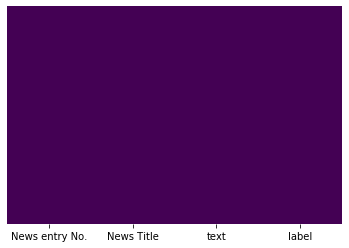

In [4]:
# To identify missing records in the dataset
# Yellow - missing values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
#no missing values


#labels 
labels=df.label
print('Unique labels used for classifying news are :')
np.unique(labels)

Unique labels used for classifying news are :


array(['FAKE', 'REAL'], dtype=object)

In [6]:
df.groupby('label').size()

label
FAKE    3164
REAL    3171
dtype: int64

In [7]:
print('ratio of fake news =', str(3164/(3164+3171)) )

ratio of fake news = 0.4994475138121547


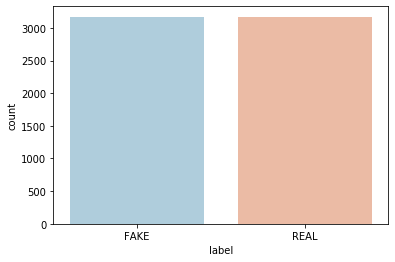

In [8]:
sns.countplot(x='label',data=df,palette='RdBu_r') 

In [9]:
df1= df.copy()
df1.drop("label",axis=1)
df1.head()

,News entry No.,News Title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [10]:
#Filter out numbers and special characters


df1['text'] = df1['text'].apply(lambda x: ''.join([" " if ord(i) < 32 or (ord(i) > 32 and ord(i) < 65) or (ord(i) > 90 and ord(i) < 97) or ord(i) > 122 else i for i in x]))
df1['News Title'] = df1['News Title'].apply(lambda x: ''.join([" " if ord(i) < 32 or (ord(i) > 32 and ord(i) < 65) or (ord(i) > 90 and ord(i) < 97) or ord(i) > 122 else i for i in x]))

In [11]:
df1['text'] = df1['text'].str.lower()
df1['News Title'] = df1['News Title'].str.lower()
df1['label'] = df1['label'].str.lower()
df1.head()

,News entry No.,News Title,text,label
0,8476,you can smell hillary s fear,daniel greenfield a shillman journalism fello...,fake
1,10294,watch the exact moment paul ryan committed pol...,google pinterest digg linkedin reddit stumbleu...,fake
2,3608,kerry to go to paris in gesture of sympathy,u s secretary of state john f kerry said mon...,real
3,10142,bernie supporters on twitter erupt in anger ag...,kaydee king kaydeeking november t...,fake
4,875,the battle of new york why this primary matters,it s primary day in new york and front runners...,real


In [12]:
#Removing stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords') # You may need to run this first
stop_array = (stopwords.words('english'))

# Remove stop words
df1['text'] = df1['text'].apply(lambda row: ' '.join([" " if word in stop_array else word for word in row.split()]))
df1['News Title'] = df1['News Title'].apply(lambda row: ' '.join([" " if word in stop_array else word for word in row.split()]))

df1.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chest\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,News entry No.,News Title,text,label
0,8476,smell hillary fear,daniel greenfield shillman journalism fellow...,fake
1,10294,watch exact moment paul ryan committed polit...,google pinterest digg linkedin reddit stumbleu...,fake
2,3608,kerry go paris gesture sympathy,u secretary state john f kerry said monday...,real
3,10142,bernie supporters twitter erupt anger ...,kaydee king kaydeeking november lesson ton...,fake
4,875,battle new york primary matters,primary day new york front runners hil...,real


# Building the model

In [13]:
#Train-Test Split
x_train,x_test,y_train,y_test=train_test_split(df1['text'], labels, test_size=0.2, random_state=5)
x_train
x_test
y_train
y_test

1227    FAKE
5803    FAKE
4976    REAL
1112    FAKE
6083    FAKE
1315    FAKE
1445    REAL
2390    FAKE
3785    FAKE
5530    FAKE
3178    FAKE
1349    REAL
5799    FAKE
3822    FAKE
4008    REAL
3531    FAKE
6283    REAL
2928    REAL
3386    FAKE
3354    FAKE
1333    REAL
4936    FAKE
5849    REAL
3598    FAKE
911     FAKE
564     REAL
2619    REAL
628     FAKE
3556    REAL
2585    FAKE
        ... 
3907    FAKE
3155    FAKE
2288    FAKE
2861    REAL
4506    FAKE
3259    REAL
1157    FAKE
75      REAL
710     FAKE
1563    FAKE
413     REAL
3423    FAKE
4876    REAL
4922    FAKE
4444    FAKE
2283    REAL
2961    FAKE
1804    REAL
5254    FAKE
3474    FAKE
1484    FAKE
4038    REAL
3701    REAL
640     REAL
2842    FAKE
4502    FAKE
5363    REAL
5660    FAKE
4955    REAL
1931    FAKE
Name: label, Length: 1267, dtype: object

In [14]:
#Initializing Tf-Idf vectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.8)

#Fit and transform train set, and transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [15]:
#Initializing Count vectorizer
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(x_train)
count_test = count_vectorizer.transform(x_test)

In [16]:
print(tfidf_vectorizer.get_feature_names()[-10:])
print(count_vectorizer.get_feature_names()[:10])

['zvi', 'zvulun', 'zvz', 'zweiter', 'zwick', 'zwicker', 'zwischenmenschlicher', 'zxycmwjdxj', 'zyuganov', 'zyzs']
['aa', 'aaa', 'aaahhh', 'aab', 'aachen', 'aadmi', 'aae', 'aaeeb', 'aaib', 'aalia']


# Applying Models

# 1. MultinomialNB

In [17]:
from sklearn.naive_bayes import MultinomialNB
multi_nb = MultinomialNB()
np.shape(tfidf_train)
np.shape(y_train)
multi_nb.fit(tfidf_train, y_train)
pred = multi_nb.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score) 

accuracy:   0.829


In [18]:
#FUNCTION TO PLOT CONFUSION MATRIX

def plot_confusion_matrix(cm, classes,
                          normalize=False, 
                          title='Confusion Matrix', 
                          cmap= plt.cm.Oranges):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
    
"""Full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

'Full source and example: \n    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html\n    \n    This function prints and plots the confusion matrix.\n    Normalization can be applied by setting `normalize=True`.\n    '

Confusion matrix, without normalization


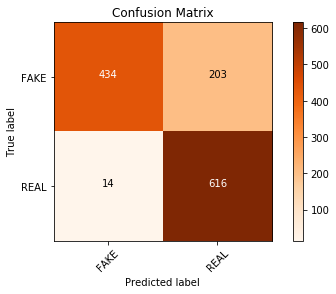

In [19]:
#Confusion matrix
m1= confusion_matrix(y_test,pred, labels=['FAKE','REAL'])
plot_confusion_matrix(m1, classes=['FAKE', 'REAL'])
plt.show()

In [20]:
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n        FAKE       0.97      0.68      0.80       637\n        REAL       0.75      0.98      0.85       630\n\n    accuracy                           0.83      1267\n   macro avg       0.86      0.83      0.83      1267\nweighted avg       0.86      0.83      0.82      1267\n'

In [21]:
count_multi_nb = MultinomialNB()
count_multi_nb.fit(count_train,y_train)
c_pred = count_multi_nb.predict(count_test)
c_score = accuracy_score(y_test,pred)
print("accuracy:   %0.3f" % c_score)


accuracy:   0.829


Confusion matrix, without normalization


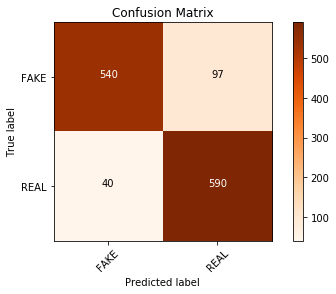

In [22]:
# the accuracy is same as tfidf

#Confusion matrix
m2= confusion_matrix(y_test,c_pred, labels=['FAKE','REAL'])
plot_confusion_matrix(m2, classes=['FAKE', 'REAL'])
plt.show()

In [23]:
classification_report(y_test, c_pred)

'              precision    recall  f1-score   support\n\n        FAKE       0.93      0.85      0.89       637\n        REAL       0.86      0.94      0.90       630\n\n    accuracy                           0.89      1267\n   macro avg       0.89      0.89      0.89      1267\nweighted avg       0.90      0.89      0.89      1267\n'

# 2. Passive Aggressive Classifier

In [35]:
#Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=80)
pac.fit(tfidf_train,y_train)

#Predict on the test set and calculating accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 94.48%


Confusion matrix, without normalization


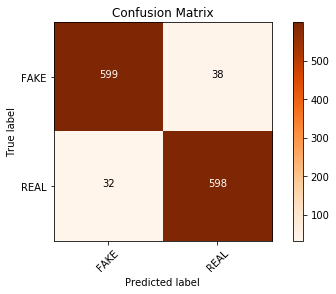

In [36]:
#Confusion matrix
m3 = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
plot_confusion_matrix(m3, classes=['FAKE', 'REAL'])
plt.show()

In [37]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n        FAKE       0.95      0.94      0.94       637\n        REAL       0.94      0.95      0.94       630\n\n    accuracy                           0.94      1267\n   macro avg       0.94      0.94      0.94      1267\nweighted avg       0.94      0.94      0.94      1267\n'

In [38]:
#Changing alpha values 
clf = MultinomialNB(alpha=0.1)
last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

C:\Users\chest\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.00 Score: 0.88003
Alpha: 0.10 Score: 0.89345
Alpha: 0.20 Score: 0.88950
Alpha: 0.30 Score: 0.88477
Alpha: 0.40 Score: 0.87293
Alpha: 0.50 Score: 0.86582
Alpha: 0.60 Score: 0.85478
Alpha: 0.70 Score: 0.84767
Alpha: 0.80 Score: 0.83899
Alpha: 0.90 Score: 0.83425


# 3. Logistic regression

C:\Users\chest\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy:   0.921
Confusion matrix, without normalization


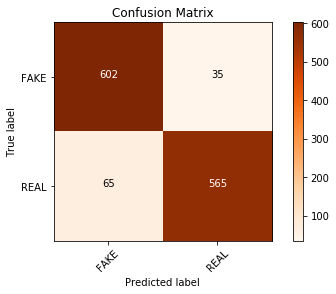

In [39]:
from sklearn.linear_model import LogisticRegression
logistic_clf = LogisticRegression()
logistic_clf.fit(tfidf_train, y_train)
pred1 = logistic_clf.predict(tfidf_test)
logistic_score = accuracy_score(y_test, pred1)
print("accuracy:   %0.3f" % logistic_score)
m4 = confusion_matrix(y_test, pred1, labels=['FAKE', 'REAL'])
plot_confusion_matrix(m4, classes=['FAKE', 'REAL'])
plt.show()


In [40]:
classification_report(y_test, pred1)

'              precision    recall  f1-score   support\n\n        FAKE       0.90      0.95      0.92       637\n        REAL       0.94      0.90      0.92       630\n\n    accuracy                           0.92      1267\n   macro avg       0.92      0.92      0.92      1267\nweighted avg       0.92      0.92      0.92      1267\n'

# 4. KNeighbours

accuracy:   0.572
Confusion matrix, without normalization


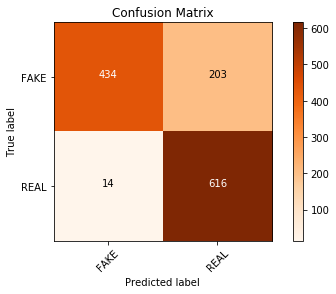

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(tfidf_train, y_train)
pred2 = knn_clf.predict(tfidf_test)
knn_score = accuracy_score(y_test, pred2)
print("accuracy:   %0.3f" % knn_score)
m5 = confusion_matrix(y_test, pred2, labels=['FAKE', 'REAL'])
plot_confusion_matrix(m1, classes=['FAKE', 'REAL'])
plt.show()


In [42]:
classification_report(y_test, pred2)

'              precision    recall  f1-score   support\n\n        FAKE       0.54      1.00      0.70       637\n        REAL       1.00      0.14      0.25       630\n\n    accuracy                           0.57      1267\n   macro avg       0.77      0.57      0.47      1267\nweighted avg       0.77      0.57      0.47      1267\n'

# Concluding Statements

(1) The fitted model( Tf- Idf Vectorizer and Passive Aggressive Classifier)  achieves an accuracy of almost 95%

(2) We have used TF-IDF vectorizer(with english 'stop words' and excluded all words above the Maximum document frequency of 0.8) for computing the TF-IDF matrix of the associated texts corresponding to each news headline(here,title).

(3) We have used an online learning algorithm for making updations to the weights or parameters of the above model. The model will adjust itself and will improve itself vastly as additional data is continuously added.